# 2. Comparing image reconstruction methods

In this section, we will compare several different image reconstruction methods. Several different methods are available in photoacoustic imaging. Each differs in its complexity, speed and physical basis.

PATATO includes two algorithms for image reconstruction, backprojection and a model-based method. Here we will compare the two. 

In [1]:
import matplotlib.pyplot as plt

import numpy as np
import patato as pat
from patato.data import get_msot_time_series_example
import timeit

As an example dataset, we will use a dataset taken from a small-animal photoacoustic scanner (iThera inVision 256-TF, iThera Medical GmbH). We scanned a single slice through a tumour-bearing mouse.

In [2]:
pa_data = get_msot_time_series_example("so2")[0:1]

First we will define a reconstruction grid to directly compare the reconstruction results.

In [3]:
# Define the reconstruction methods to compare:
nx = 101 # number of pixels
lx = 2.5e-2 # m

We will then set up our backprojection reconstruction pipeline.

In [4]:
# Define a pre-processor for backprojection
pre_bp = pat.MSOTPreProcessor(lp_filter=7e6, hp_filter=5e3)

ts_bp, settings_bp, _ = pre_bp.run(pa_data.get_time_series(), pa_data)


# Delay and sum.
das = pat.Backprojection(field_of_view=(lx, lx, 0), 
                             n_pixels=(nx, nx, 1)) # z axis must be specified but is empty in this case.

Next, we define out model-based reconstruction pipeline. Here, the program pre-calculates the forward acoustic model matrix, which is then applied in the following step. 

In [5]:
# Apply energy correction to time series data for Model Based reconstruction:
ts_model_based = pa_data.get_time_series().copy()
ts_model_based.raw_data = ts_model_based.raw_data / pa_data.get_overall_correction_factor()[:, :, None, None]

model_based = pat.ModelBasedReconstruction(field_of_view=(lx, lx, 0), 
                                           n_pixels=(nx, nx, 1), pa_example=pa_data)

GPU False
Loading model


  0%|          | 0/256 [00:00<?, ?it/s]

/Users/else01/Documents/Code Development/patato/patato/recon/model_based/model_based.py:219: UserWarning: This class is experimental. If you would like to contribute to further development of this approach, please get in touch.
  warnings.warn("This class is experimental. If you would like to contribute to further development of this "


Now, do the image reconstruction.

In [6]:
rec_backprojection, _, _ = das.run(ts_bp, pa_data, **settings_bp)
rec_modelbased, _, _ = model_based.run(ts_model_based, pa_data)

As before, we can plot the reconstructed images from the two approaches and compare them visually. 

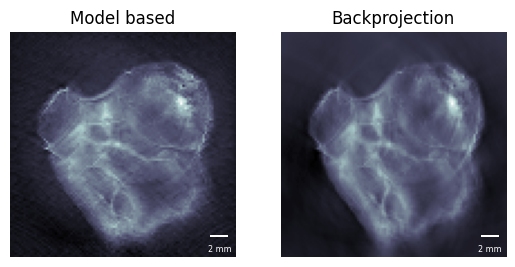

In [7]:
fig, axes = plt.subplots(1, 2)
rec_modelbased.imshow(ax = axes[0])
axes[0].set_title("Model based")
rec_backprojection.imshow(ax = axes[1])
axes[1].set_title("Backprojection")
plt.show()